# Busco por Usuários Similares

- Gráfico dos usuários e filmes
- Distäncia Euclidiana
- Distancia Euclidiana para retornar os usuários mais similares

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
avaliacoes = {'Ana': 
		{'Freddy x Jason': 2.5, 
		 'O Ultimato Bourne': 3.5,
		 'Star Trek': 3.0, 
		 'Exterminador do Futuro': 3.5, 
		 'Norbit': 2.5, 
		 'Star Wars': 3.0},
	 
	  'Marcos': 
		{'Freddy x Jason': 3.0, 
		 'O Ultimato Bourne': 3.5, 
		 'Star Trek': 1.5, 
		 'Exterminador do Futuro': 5.0, 
		 'Star Wars': 3.0, 
		 'Norbit': 3.5}, 

	  'Pedro': 
	    {'Freddy x Jason': 2.5, 
		 'O Ultimato Bourne': 3.0,
		 'Exterminador do Futuro': 3.5, 
		 'Star Wars': 4.0},
			 
	  'Claudia': 
		{'O Ultimato Bourne': 3.5, 
		 'Star Trek': 3.0,
		 'Star Wars': 4.5, 
		 'Exterminador do Futuro': 4.0, 
		 'Norbit': 2.5},
				 
	  'Adriano': 
		{'Freddy x Jason': 3.0, 
		 'O Ultimato Bourne': 4.0, 
		 'Star Trek': 2.0, 
		 'Exterminador do Futuro': 3.0, 
		 'Star Wars': 3.0,
		 'Norbit': 2.0}, 

	  'Janaina': 
	     {'Freddy x Jason': 3.0, 
	      'O Ultimato Bourne': 4.0,
	      'Star Wars': 3.0, 
	      'Exterminador do Futuro': 5.0, 
	      'Norbit': 3.5},
			  
	  'Leonardo': 
	    {'O Ultimato Bourne':4.5,
             'Norbit':1.0,
	     'Exterminador do Futuro':4.0}
}

In [39]:
df_avaliacoes = pd.DataFrame.from_dict(avaliacoes).T.reset_index().rename(columns={"index": "user"})
print(df_avaliacoes.shape)
df_avaliacoes

(7, 7)


,user,Freddy x Jason,O Ultimato Bourne,Star Trek,Exterminador do Futuro,Norbit,Star Wars
0,Ana,2.5,3.5,3.0,3.5,2.5,3.0
1,Marcos,3.0,3.5,1.5,5.0,3.5,3.0
2,Pedro,2.5,3.0,NaN,3.5,NaN,4.0
3,Claudia,NaN,3.5,3.0,4.0,2.5,4.5
4,Adriano,3.0,4.0,2.0,3.0,2.0,3.0
5,Janaina,3.0,4.0,NaN,5.0,3.5,3.0
6,Leonardo,NaN,4.5,NaN,4.0,1.0,NaN


## Gráfico de dispersão

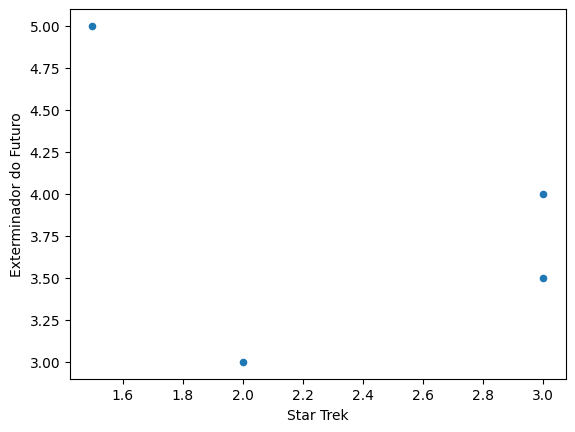

In [47]:
df_avaliacoes.plot(x="Star Trek", y="Exterminador do Futuro", kind="scatter")

plt.show()

## Distância euclidiana

![distancia-euclidiana](img/distanca-euclidiana.png)

In [59]:
def distancia_euclidiana(x_i: np.array, y_i: np.array) -> float:
    if 
    return (sum((x_i - y_i)**2))**(0.5)

Vamos ver com quem a Ana é mais parecida.

In [60]:
# Ana (x), Claudia (y)

x_i = np.array([3., 3.5]) # start trek, exterminador
y_i = np.array([3., 4.])


distancia_euclidiana(x_i, y_i)

0.5

In [61]:
# Ana (x), Marcos (y)

x_i = np.array([3., 3.5]) # start trek, exterminador
y_i = np.array([1.5, 5.])


distancia_euclidiana(x_i, y_i)

2.1213203435596424

In [62]:
# Ana (x), Adriano (y)

x_i = np.array([3., 3.5]) # start trek, exterminador
y_i = np.array([2., 3.])


distancia_euclidiana(x_i, y_i)

1.118033988749895

Ou seja, a Ana é mais parecido com a Claudia do que com o Adriano e com o Marcos. Perceba que para realizar esse calculo os três usuarios devem ter assistido aos mesmos filmes, nós não poderíamos comparar com o Leonardo agora pois ele não assistiu "Star Trek". Para comparar a Ana com o Leonardo, pegamos os filmes que ambos assistiram.

In [63]:
# Ana (x), Leonardo (y)

x_i = np.array([3.5, 3.5, 2.5]) # ultimato bourne, exterminador e norbit
y_i = np.array([4.5, 4., 1.])


distancia_euclidiana(x_i, y_i)

1.8708286933869707

In [64]:
def similaridade(x_i: np.array, y_i: np.array) -> float:
    return 1/(1+ distancia_euclidiana(x_i, y_i))

In [65]:
# Ana (x), Leonardo (y)

x_i = np.array([3.5, 3.5, 2.5]) # ultimato bourne, exterminador e norbit
y_i = np.array([4.5, 4., 1.])


similaridade(x_i, y_i)

0.3483314773547883

In [66]:
# Ana (x), Claudia (y)

x_i = np.array([3., 3.5]) # start trek, exterminador
y_i = np.array([3., 4.])


similaridade(x_i, y_i)

0.6666666666666666

Vamos criar uma função que funcione com o DataFrame

In [84]:
def similaridade_df(user_1: str, user_2: str) -> float:
    df = df_avaliacoes.loc[df_avaliacoes.user.isin([user_1, user_2])]
    df = df.dropna(axis=1)
    
    x_i = df.loc[df.user==user_1].drop("user", axis=1).values[0]
    y_i = df.loc[df.user==user_2].drop("user", axis=1).values[0]

    return similaridade(x_i, y_i)

In [92]:
usuarios =df_avaliacoes.user.unique()
usuarios

array(['Ana', 'Marcos', 'Pedro', 'Claudia', 'Adriano', 'Janaina',
       'Leonardo'], dtype=object)

In [85]:
similaridade_df("Ana", "Leonardo")

0.3483314773547883

Vamos fazer a similaridade entre todas as relações (em duplas) do banco de dados

In [101]:
import itertools

permutacoes = itertools.combinations(usuarios, 2)
duplas = list(permutacoes)

In [126]:
df_resultados = pd.DataFrame(duplas, columns=["user_1", "user_2"])
df_resultados["similaridade"] = df_resultados.apply(lambda i: similaridade_df(i["user_1"], i["user_2"]), axis=1)
df_resultados

,user_1,user_2,similaridade
0,Ana,Marcos,0.294298
1,Ana,Pedro,0.472136
2,Ana,Claudia,0.387426
3,Ana,Adriano,0.414214
4,Ana,Janaina,0.340542
5,Ana,Leonardo,0.348331
6,Marcos,Pedro,0.340542
7,Marcos,Claudia,0.281729
8,Marcos,Adriano,0.277926
9,Marcos,Janaina,0.666667


In [127]:
df_resultados.loc[df_resultados.similaridade==max(df_resultados.similaridade)]

,user_1,user_2,similaridade
9,Marcos,Janaina,0.666667


In [119]:
df_resultados.loc[df_resultados.duplas==("Ana", "Marcos")]

,duplas,similaridade
0,"(Ana, Marcos)",0.294298


In [132]:
df_leo = df_resultados.loc[(df_resultados.user_1=="Leonardo") | (df_resultados.user_2=="Leonardo")]
df_leo.loc[df_leo.similaridade==max(df_leo.similaridade)]

,user_1,user_2,similaridade
19,Adriano,Leonardo,0.4


A relação com maior similaridade é entre Marcos e Janaina e a relação em que o Leonardo apresenta maior similaridade é com o Adriano, assim, olhando a tabela abaixo poderíamos recomendar "Freddy x Jason" ou "Star Wars" para o Leonardo, eu nao reocmendaria Star Trek pois apresenta uma avaliacao baixa.

In [131]:
df_avaliacoes

,user,Freddy x Jason,O Ultimato Bourne,Star Trek,Exterminador do Futuro,Norbit,Star Wars
0,Ana,2.5,3.5,3.0,3.5,2.5,3.0
1,Marcos,3.0,3.5,1.5,5.0,3.5,3.0
2,Pedro,2.5,3.0,NaN,3.5,NaN,4.0
3,Claudia,NaN,3.5,3.0,4.0,2.5,4.5
4,Adriano,3.0,4.0,2.0,3.0,2.0,3.0
5,Janaina,3.0,4.0,NaN,5.0,3.5,3.0
6,Leonardo,NaN,4.5,NaN,4.0,1.0,NaN
